Libraries and dataset load

In [43]:
#importing Libraries:
import os
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('../data/employee_attrition_dataset.csv')
print(df['Department'].unique())  # Check unique values
print(df.dtypes) 

['IT' 'Sales' 'Marketing' 'Finance' 'HR']
Employee_ID                       int64
Age                               int64
Gender                           object
Marital_Status                   object
Department                       object
Job_Role                         object
Job_Level                         int64
Monthly_Income                    int64
Hourly_Rate                       int64
Years_at_Company                  int64
Years_in_Current_Role             int64
Years_Since_Last_Promotion        int64
Work_Life_Balance                 int64
Job_Satisfaction                  int64
Performance_Rating                int64
Training_Hours_Last_Year          int64
Overtime                         object
Project_Count                     int64
Average_Hours_Worked_Per_Week     int64
Absenteeism                       int64
Work_Environment_Satisfaction     int64
Relationship_with_Manager         int64
Job_Involvement                   int64
Distance_From_Home                int6

Load info

In [44]:
print("Number of rows and columns:", df.shape)
df.head

Number of rows and columns: (1000, 26)


<bound method NDFrame.head of      Employee_ID  Age  Gender Marital_Status Department   Job_Role  Job_Level  \
0              1   58  Female        Married         IT    Manager          1   
1              2   48  Female        Married      Sales  Assistant          5   
2              3   34    Male        Married  Marketing  Assistant          1   
3              4   27  Female       Divorced  Marketing    Manager          1   
4              5   40    Male       Divorced  Marketing  Executive          1   
..           ...  ...     ...            ...        ...        ...        ...   
995          996   27  Female       Divorced         HR    Analyst          2   
996          997   47    Male         Single         IT    Manager          4   
997          998   50  Female       Divorced         IT  Executive          1   
998          999   28  Female        Married         HR  Executive          4   
999         1000   48  Female       Divorced         IT    Analyst          2  

In [45]:
print(df.isnull().sum())

Employee_ID                      0
Age                              0
Gender                           0
Marital_Status                   0
Department                       0
Job_Role                         0
Job_Level                        0
Monthly_Income                   0
Hourly_Rate                      0
Years_at_Company                 0
Years_in_Current_Role            0
Years_Since_Last_Promotion       0
Work_Life_Balance                0
Job_Satisfaction                 0
Performance_Rating               0
Training_Hours_Last_Year         0
Overtime                         0
Project_Count                    0
Average_Hours_Worked_Per_Week    0
Absenteeism                      0
Work_Environment_Satisfaction    0
Relationship_with_Manager        0
Job_Involvement                  0
Distance_From_Home               0
Number_of_Companies_Worked       0
Attrition                        0
dtype: int64


In [46]:
print(df['Department'].unique())  # Check unique values
print(df.dtypes) 

['IT' 'Sales' 'Marketing' 'Finance' 'HR']
Employee_ID                       int64
Age                               int64
Gender                           object
Marital_Status                   object
Department                       object
Job_Role                         object
Job_Level                         int64
Monthly_Income                    int64
Hourly_Rate                       int64
Years_at_Company                  int64
Years_in_Current_Role             int64
Years_Since_Last_Promotion        int64
Work_Life_Balance                 int64
Job_Satisfaction                  int64
Performance_Rating                int64
Training_Hours_Last_Year          int64
Overtime                         object
Project_Count                     int64
Average_Hours_Worked_Per_Week     int64
Absenteeism                       int64
Work_Environment_Satisfaction     int64
Relationship_with_Manager         int64
Job_Involvement                   int64
Distance_From_Home                int6

Data Pre-Processing

In [ ]:
'''from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Attrition':  # Attrition will be encoded separately
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target variable 'Attrition'
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
'''

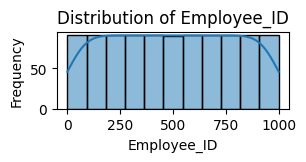

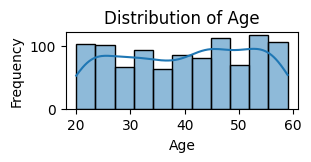

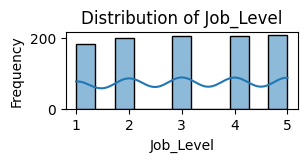

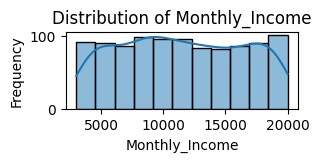

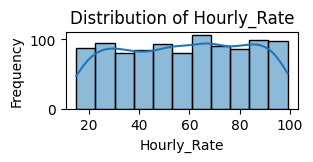

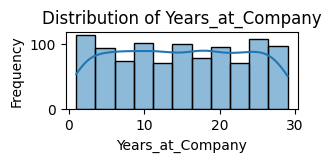

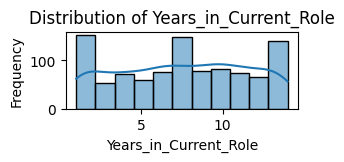

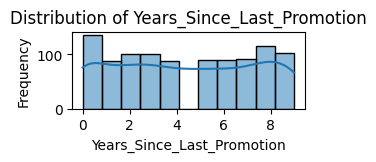

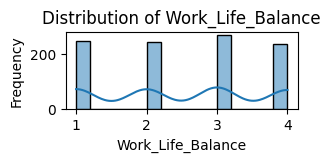

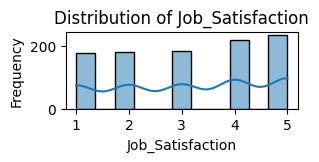

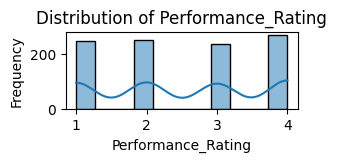

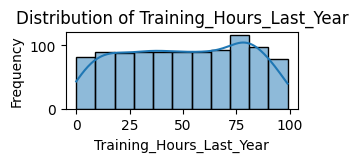

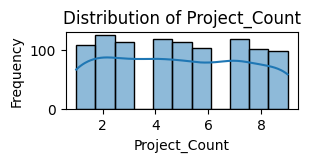

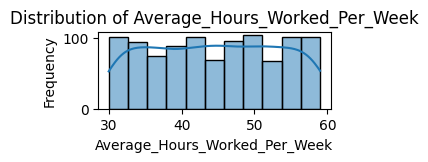

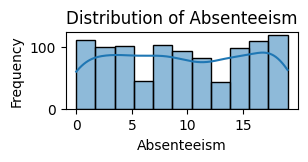

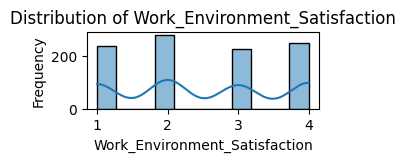

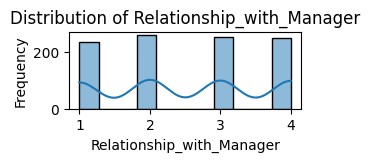

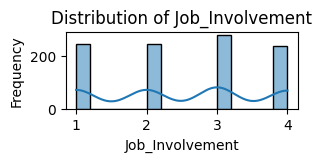

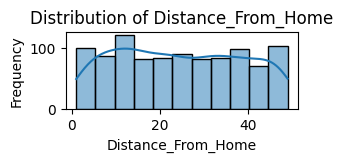

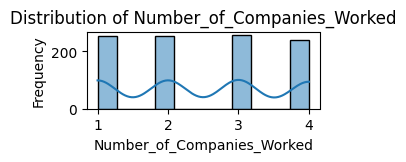

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numeric columns
numeric_columns = df.select_dtypes(include='number').columns
for col in numeric_columns:
    plt.figure(figsize=(3, 1))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
#visuals folder access
visuals_dir = '../visuals/'
os.makedirs(visuals_dir, exist_ok=True)

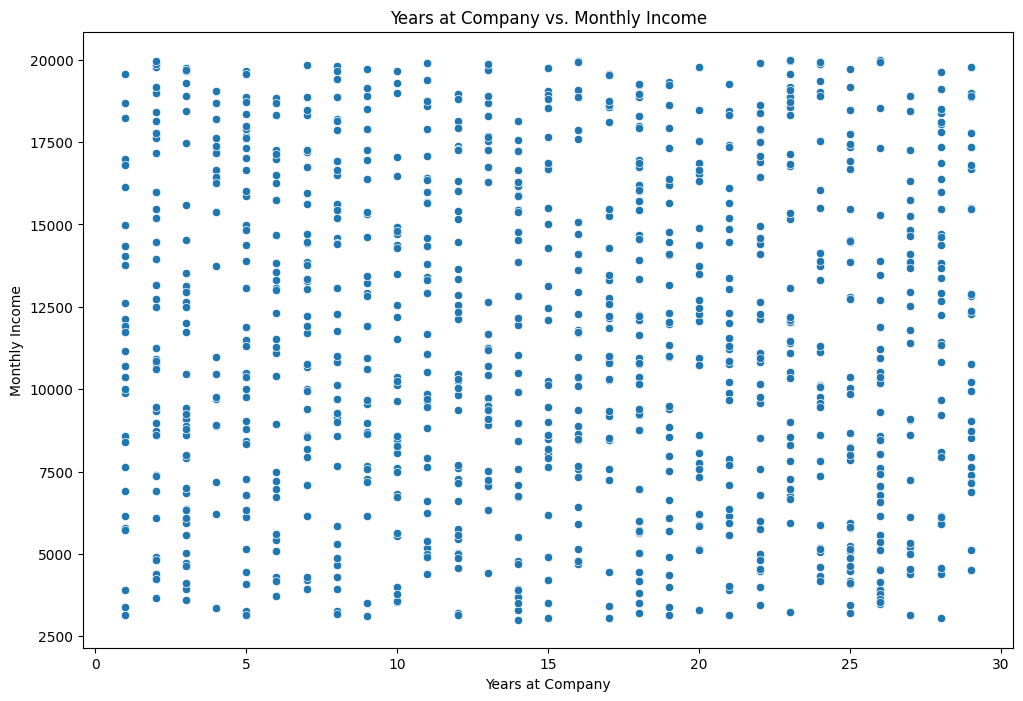

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Years_at_Company', y='Monthly_Income')
plt.title('Years at Company vs. Monthly Income')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
# Save and display the plot
plt.savefig(os.path.join(visuals_dir, 'year-company map.png'))
plt.show()

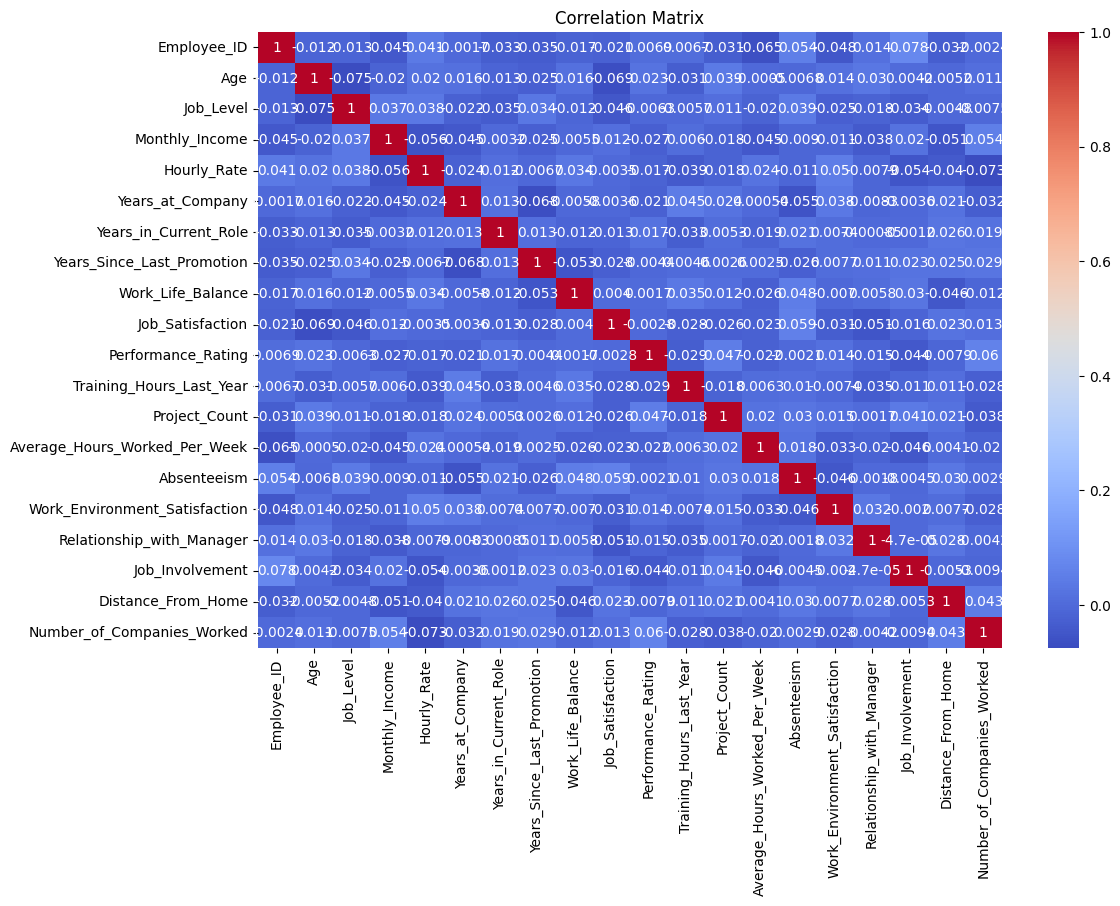

In [50]:
#heatmap
numeric_columns = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig(os.path.join(visuals_dir, 'Coorelation heatmap.png'))
plt.show()    

Analysis:

1. Atrrition prediction:

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('Attrition_Yes', axis=1)
y = df_encoded['Attrition_Yes']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.84      1.00      0.92       169
        True       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200



e:\Project\MyEnv1\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
e:\Project\MyEnv1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Project\MyEnv1\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted sampl

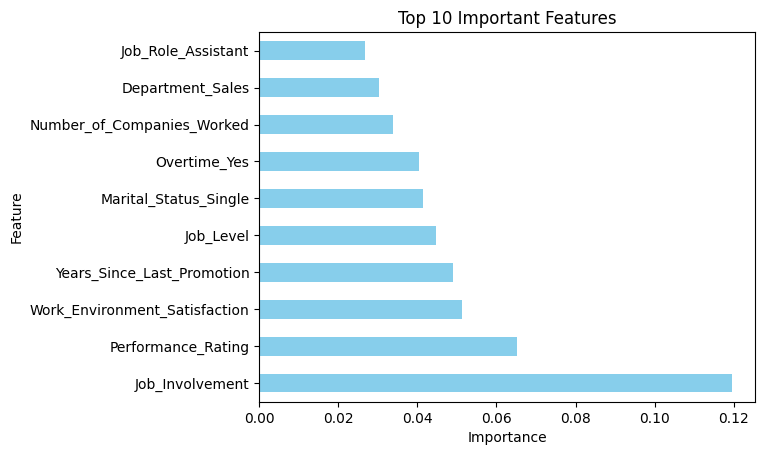

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate absolute values of coefficients as feature importance
feat_importances = pd.Series(np.abs(model.coef_[0]), index=X.columns)

# Plot top 10 important features
feat_importances.nlargest(10).plot(kind='barh', title='Top 10 Important Features', color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.savefig(os.path.join(visuals_dir, 'important features.png'))
plt.show()



2. Employee Benchmarking

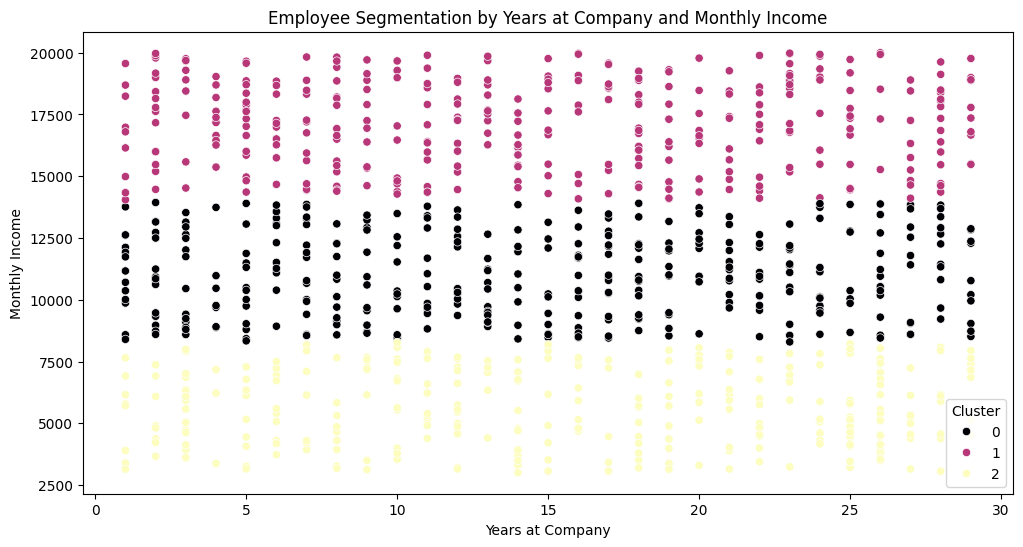

In [53]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = df[['Age', 'Monthly_Income', 'Years_at_Company', 'Job_Satisfaction']]

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Years_at_Company', y='Monthly_Income', hue='Cluster', data=df, palette='magma')
plt.title('Employee Segmentation by Years at Company and Monthly Income')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Income')
# Save and display the plot
plt.savefig(os.path.join(visuals_dir, 'cluster map segment-income.png'))
    
plt.show()

3. Ready to be Promoted

In [54]:
df['Promotion_Score'] = (df['Performance_Rating'] * 0.5 + df['Years_in_Current_Role'] * 0.3 + df['Training_Hours_Last_Year'] * 0.2)

# Identify top candidates for promotion
top_candidates = df[['Employee_ID', 'Promotion_Score']].sort_values(by='Promotion_Score', ascending=False)
print(top_candidates.head(10))

     Employee_ID  Promotion_Score
356          357             25.4
390          391             25.3
887          888             25.1
291          292             24.6
983          984             24.4
483          484             24.2
652          653             24.0
515          516             24.0
96            97             23.9
834          835             23.8


C:\Users\sakaa\AppData\Local\Temp\ipykernel_5972\376450492.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Promotion_Score', y='Employee_ID', data=top_10, palette='magma')


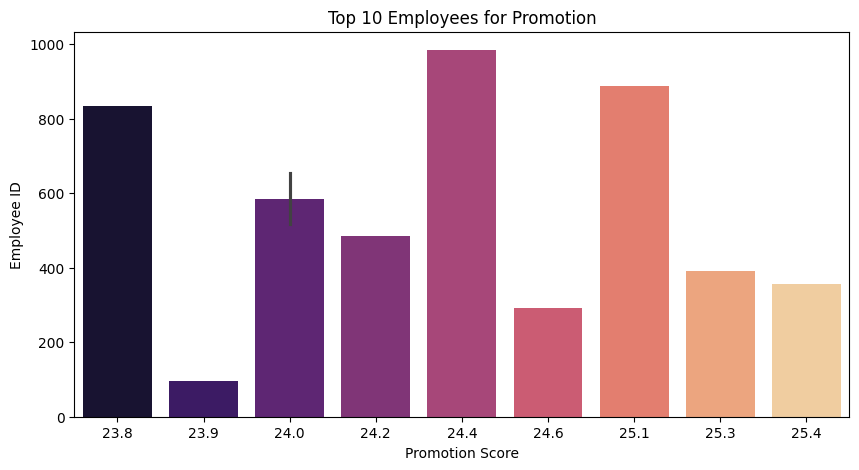

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot top 10 employees using bar graph
top_10 = top_candidates.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Promotion_Score', y='Employee_ID', data=top_10, palette='magma')
plt.xlabel('Promotion Score')
plt.ylabel('Employee ID')
plt.title('Top 10 Employees for Promotion')
# Save and display the plot
plt.savefig(os.path.join(visuals_dir, 'promotion_employees.png'))

plt.show()

C:\Users\sakaa\AppData\Local\Temp\ipykernel_5972\2586401439.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Promotion_Score', data=df, palette='coolwarm')


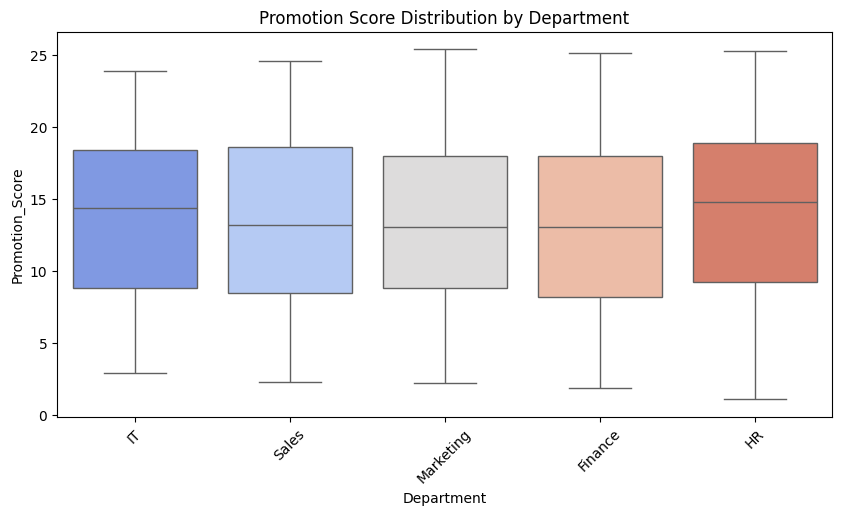

In [56]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Department', y='Promotion_Score', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Promotion Score Distribution by Department')
plt.savefig(os.path.join(visuals_dir, 'promotion by dept.png'))
plt.show()

4. Gender Division in different depatrments:

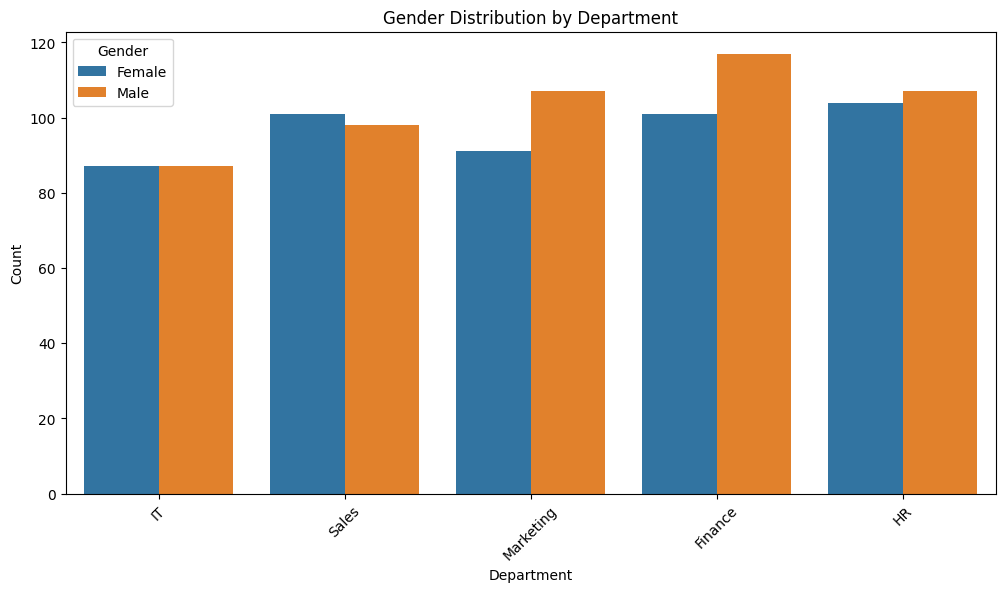

In [57]:
df['Department'] = df['Department'].astype(str)

plt.figure(figsize=(12, 6))
sns.countplot(x='Department', hue='Gender', data=df)
plt.title('Gender Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)  # Rotate labels for better readability (optional)
plt.savefig(os.path.join(visuals_dir, 'gender dist.png'))
plt.show()